In [ ]:
#conda install -c conda-forge mscorefonts
#Then detete the cache as follows:
#rm ~/.cache/matplotlib -rf
#Use the following as fit:

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 23
datas = ['mini_test', 'crop','euro', 'isic', 'chest']
datas_full = ['miniIm test', 'CropDiseases', 'EuroSAT', 'ISIC', 'ChestX']
backbone = ['18', '34', '50', '101', '152']
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
print(mpl.matplotlib_fname())

import matplotlib
myfonts = "Times New Roman"
#matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = myfonts

['Times New Roman']
23.0
/home/yujin/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


### Baseline

In [41]:
result_f

,01shot,05shot,20shot
mini_test,49.522223,75.666668,87.382224
crop,66.82889,92.05778,97.886668
euro,56.062223,82.680002,92.875558
isic,30.922223,48.246668,62.975557
chest,22.244445,24.000001,32.977778


In [57]:
np.arange(bar_width+0.18, 5.18 + bar_width, 1)

array([0.26, 1.26, 2.26, 3.26, 4.26])

In [48]:
result = result_f - result_h
result.loc[:,'01shot'].values.astype('float')

array([-6.948889  , -6.28888908, -8.66000022,  1.53111122, -0.31111116])

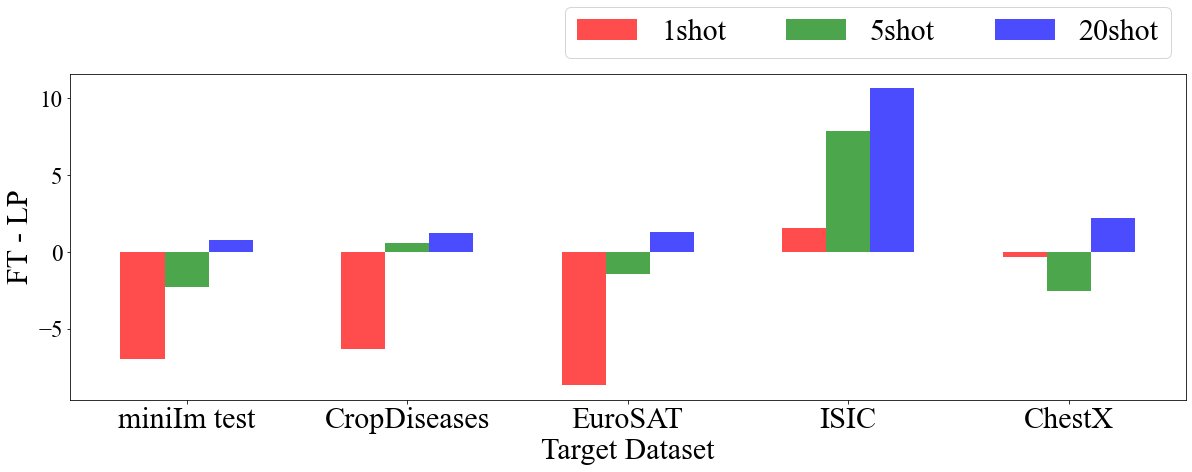

In [71]:
result_f = pd.DataFrame(None, index=datas, columns=['01shot', '05shot', '20shot'])
for data in result_f.index:
    for bs in result_f.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result_f.loc[data][bs] = acc

result_h = pd.DataFrame(None, index=datas, columns=['01shot', '05shot', '20shot'])
for data in result_h.index:
    for bs in result_h.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result_h.loc[data][bs] = acc
        
result = result_f - result_h

shot_lst = ['01shot', '05shot', '20shot']

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(20,6))
bar_width = 0.2

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(5)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐

b1 = plt.bar(index, result.loc[:, '01shot'].values.astype('float'), bar_width, alpha=0.7, color='red', label='1shot')

b2 = plt.bar(index + bar_width, result.loc[:, '05shot'].values.astype('float'), bar_width, alpha=0.7, color='green', label='5shot')

b3 = plt.bar(index + 2*bar_width, result.loc[:, '20shot'].values.astype('float'), bar_width, alpha=0.7, color='blue', label='20shot')

# b4 = plt.bar(index + 3*bar_width, result_f.loc['crop'].values, bar_width, alpha=0.7, color='orange', label=None)

# b5 = plt.bar(index + 4*bar_width, result_h.loc['euro'].values, bar_width, alpha=0.4, color='green', label='euro')

# b6 = plt.bar(index + 5*bar_width, result_f.loc['euro'].values, bar_width, alpha=0.7, color='green', label=None)

# b7 = plt.bar(index + 6*bar_width, result_h.loc['isic'].values, bar_width, alpha=0.4, color='blue', label='isic')

# b8 = plt.bar(index + 7*bar_width, result_f.loc['isic'].values, bar_width, alpha=0.7, color='blue', label=None)

# b9 = plt.bar(index + 8*bar_width, result_h.loc['chest'].values, bar_width, alpha=0.4, color='purple', label='chest')

# b10 = plt.bar(index + 9*bar_width, result_f.loc['chest'].values, bar_width, alpha=0.7, color='purple', label=None)



# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width+0, 5 + bar_width, 1), datas_full, size = 30)

# x축, y축 이름 및 범례 설정
plt.xlabel('Target Dataset', size = 30)
plt.ylabel('FT - LP', size = 30)
#plt.ylim([0, 20])
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.25), fontsize = 30, ncol=5)
plt.savefig('./img_pdf/full/why_full.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [ ]:
CD-FSL/logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_full_default/augmentation/base/test_history.csv

In [39]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for types in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_full_default/augmentation/base/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                                 1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][types] = acc
result

,1shot,5shot
mini_test,52.02 ± 0.79,74.55 ± 0.65
crop,64.84 ± 0.93,90.69 ± 0.50
euro,56.40 ± 0.84,77.40 ± 0.63
isic,32.12 ± 0.59,46.96 ± 0.66
chest,22.06 ± 0.38,26.55 ± 0.42


In [37]:
result = pd.DataFrame(None, index=datas, columns=['same', 'diff'])
for data in result.index:
    for types in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/{}/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                                 1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][types] = acc
result

,same,diff
mini_test,75.00 ± 0.63,73.86 ± 0.66
crop,92.41 ± 0.49,92.05 ± 0.51
euro,82.81 ± 0.58,83.18 ± 0.60
isic,48.32 ± 0.61,45.17 ± 0.58
chest,25.93 ± 0.39,26.33 ± 0.44


In [18]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_full_default/cutmix/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,56.04 ± 0.85,75.20 ± 0.65
crop,46.81 ± 1.11,56.67 ± 1.28
euro,47.70 ± 0.78,60.85 ± 0.86
isic,25.99 ± 0.48,30.50 ± 0.53
chest,21.39 ± 0.31,22.82 ± 0.34


In [33]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_full_default/augmentation/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_randomhorizontalflip.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,49.45 ± 0.78,76.25 ± 0.62
crop,68.45 ± 0.91,93.08 ± 0.46
euro,58.37 ± 0.82,83.77 ± 0.58
isic,31.36 ± 0.56,49.80 ± 0.63
chest,22.20 ± 0.38,26.18 ± 0.42


In [87]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_no_pretrain/{}/05way_00{}_full_no_pretrain/augmentation/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_randomhorizontalflip.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,29.26 ± 0.56,40.70 ± 0.68
crop,52.90 ± 0.87,78.22 ± 0.74
euro,43.09 ± 0.87,54.80 ± 0.83
isic,27.03 ± 0.56,39.43 ± 0.61
chest,21.18 ± 0.37,22.69 ± 0.39


In [27]:
bs = 5

# pretrain
pretrain = []
for data in datas:
    path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}shot_full_default/".format(data, bs)
    test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
    acc = test_acc.mean()[-1] * 100
    pretrain.append(acc)

# pretrain_flip
pretrain_flip = []
for data in datas:
    path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}shot_full_default/augmentation/".format(data, bs)
    test_acc = pd.read_csv(path+"test_history_old_randomhorizontalflip.csv", index_col='Unnamed: 0')
    acc = test_acc.mean()[-1] * 100
    pretrain_flip.append(acc)

# pretrain_cutmix
pretrain_cutmix = []
for data in datas:
    path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}shot_full_default/cutmix/".format(data, bs)
    test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
    acc = test_acc.mean()[-1] * 100
    pretrain_cutmix.append(acc)
    
# no pretrain
no_pretrain = []
for data in datas:
    path = "./logs/baseline/output/resnet10_simclr_LS_no_pretrain/{}/05way_00{}shot_full_no_pretrain/".format(data, bs)
    test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
    acc = test_acc.mean()[-1] * 100
    no_pretrain.append(acc)

# no pretrain + flip
no_pretrain_flip = []
for data in datas:
    path = "./logs/baseline/output/resnet10_simclr_LS_no_pretrain/{}/05way_00{}shot_full_no_pretrain/augmentation/".format(data, bs)
    
    test_acc = pd.read_csv(path+"test_history_randomhorizontalflip.csv", index_col='Unnamed: 0')
    acc = test_acc.mean()[-1] * 100
    no_pretrain_flip.append(acc)

# no pretrain + cutmix
no_pretrain_cutmix = []
for data in datas:
    path = "./logs/baseline/output/resnet10_simclr_LS_no_pretrain/{}/05way_00{}shot_full_no_pretrain/cutmix/".format(data, bs)
    test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
    acc = test_acc.mean()[-1] * 100
    no_pretrain_cutmix.append(acc)

FileNotFoundError: [Errno 2] No such file or directory: './logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_005shot_full_default/augmentation/test_history_old_randomhorizontalflip.csv'

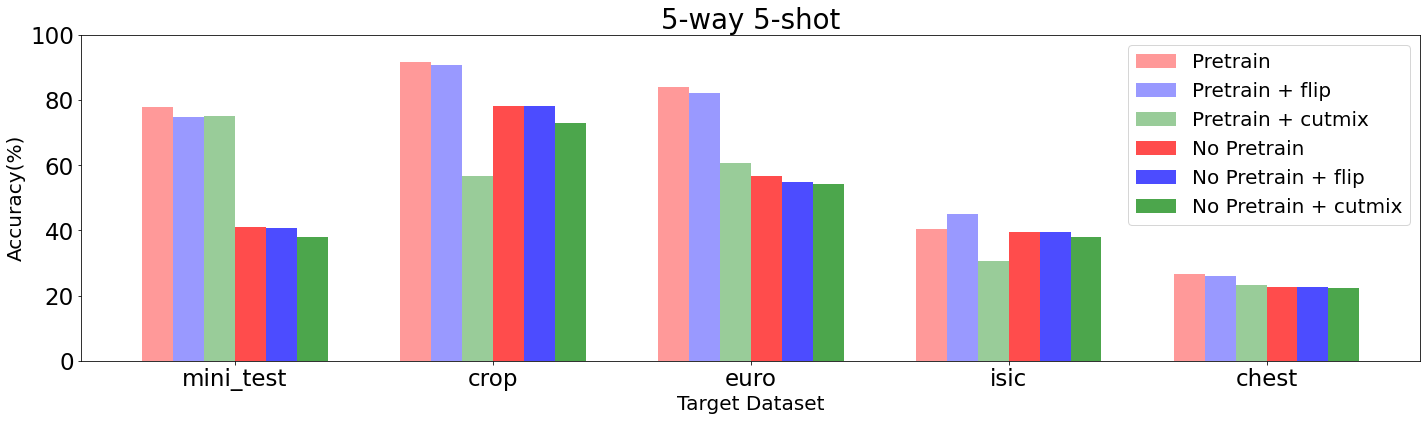

In [24]:
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(24,6))
bar_width = 0.12

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(5)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, pretrain, bar_width, alpha=0.4, color='red', label='Pretrain')

b2 = plt.bar(index + bar_width, pretrain_flip, bar_width, alpha=0.4, color='blue', label='Pretrain + flip')

b3 = plt.bar(index + 2*bar_width, pretrain_cutmix, bar_width, alpha=0.4, color='green', label='Pretrain + cutmix')

b4 = plt.bar(index + 3*bar_width, no_pretrain, bar_width, alpha=0.7, color='red', label='No Pretrain')

b5 = plt.bar(index + 4*bar_width, no_pretrain_flip, bar_width, alpha=0.7, color='blue', label='No Pretrain + flip')

b6 = plt.bar(index + 5*bar_width, no_pretrain_cutmix, bar_width, alpha=0.7, color='green', label='No Pretrain + cutmix')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width+0.18, 5.18 + bar_width, 1), datas)

# x축, y축 이름 및 범례 설정
plt.xlabel('Target Dataset', size = 20)
plt.ylabel('Accuracy(%)', size = 20)
plt.ylim([0, 100])
plt.legend(fontsize = 20)
plt.title("5-way {}-shot".format(bs))
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

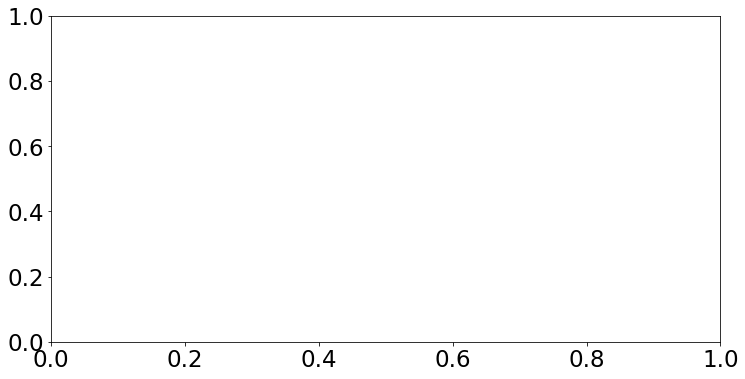

In [51]:
flip = []
for data in datas:
    path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_head_default/augmentation/".format(data)
    test_acc = pd.read_csv(path+"test_history_aug_randomhorizontalflip_old.csv", index_col='Unnamed: 0')
    acc = test_acc.mean()[-1] * 100
    flip.append(acc)
base = []
for data in datas:
    path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_head_default/".format(data)
    test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
    acc = test_acc.mean()[-1] * 100
    base.append(acc)

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(5)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, base, bar_width, alpha=0.4, color='red', label='Baseline')

b2 = plt.bar(index + bar_width, flip, bar_width, alpha=0.4, color='blue', label='Horizontal Flip')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width-0.13, 4.87 + bar_width, 1), datas)

# x축, y축 이름 및 범례 설정
plt.xlabel('Target Dataset', size = 20)
plt.ylabel('Accuracy(%)', size = 20)
plt.ylim([0, 100])
plt.legend()
plt.show()

### Full

In [97]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_full_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,49.57 ± 0.79,75.67 ± 0.65
crop,66.78 ± 0.91,92.14 ± 0.49
euro,56.45 ± 0.84,82.58 ± 0.60
isic,31.03 ± 0.55,48.35 ± 0.62
chest,22.35 ± 0.38,26.30 ± 0.42


### Correct Full

In [13]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_full_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_old.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,49.60 ± 0.77,75.65 ± 0.64
crop,66.72 ± 0.89,92.00 ± 0.50
euro,56.84 ± 0.82,82.63 ± 0.61
isic,30.60 ± 0.55,48.36 ± 0.62
chest,22.33 ± 0.38,26.48 ± 0.40


In [ ]:
CD-FSL/logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_head_default/mixup/test_history.csv

In [89]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/mixup/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_check.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,41.36 ± 0.80,68.83 ± 0.72
crop,58.88 ± 1.06,87.22 ± 0.60
euro,58.40 ± 0.93,81.42 ± 0.64
isic,28.21 ± 0.51,39.47 ± 0.53
chest,21.94 ± 0.37,26.12 ± 0.43


In [88]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/mixup/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,54.30 ± 0.82,74.03 ± 0.66
crop,47.55 ± 1.10,58.60 ± 1.23
euro,41.80 ± 0.77,53.04 ± 0.97
isic,26.08 ± 0.50,30.60 ± 0.55
chest,21.35 ± 0.29,23.06 ± 0.34


In [73]:
# 옛날에 이상하게 잘나온거 
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_cutmix_v1_30_70.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,57.72 ± 0.84,76.97 ± 0.64
crop,75.37 ± 0.85,92.10 ± 0.48
euro,67.71 ± 0.85,85.82 ± 0.58
isic,33.05 ± 0.61,45.64 ± 0.61
chest,22.76 ± 0.39,26.01 ± 0.42


In [67]:
test_acc = pd.read_csv("./logs/baseline/output/resnet10_simclr_LS_default/chest/05way_005shot_head_default/augmentation/test_history_randomgaussianblur.csv", index_col='Unnamed: 0')
print ('{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))

26.78 ± 0.42


In [ ]:
CD-FSL/logs/baseline/output/resnet10_simclr_LS_default/isic/05way_005shot_full_default/manifold_mixup/test_history.csv

In [57]:
test_acc = pd.read_csv("./logs/baseline/output/resnet10_simclr_LS_default/euro/05way_001shot_full_default/manifold_mixup/test_history.csv", index_col='Unnamed: 0')
print ('{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))

result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/augmentation/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_randomgaussianblur.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

In [303]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_aug_base_30_70.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,50.83 ± 0.81,75.26 ± 0.63
crop,59.70 ± 0.97,87.75 ± 0.57
euro,55.32 ± 0.86,79.36 ± 0.60
isic,30.45 ± 0.54,44.62 ± 0.59
chest,21.67 ± 0.33,25.50 ± 0.41


### Check augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


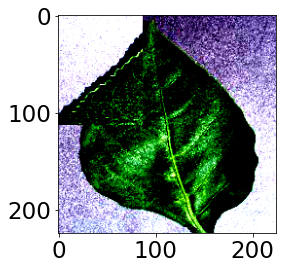

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


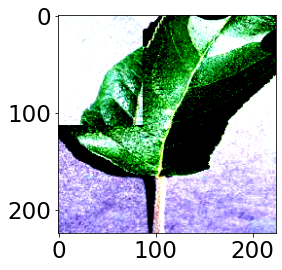

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


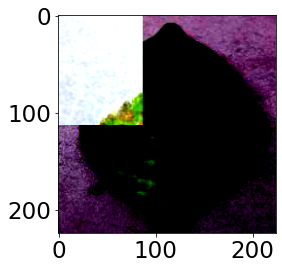

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


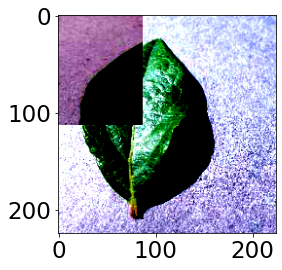

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


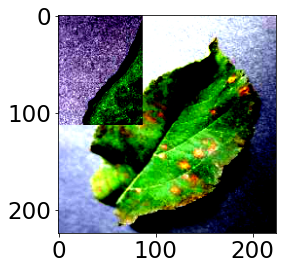

In [351]:
with open('./logs/baseline/output/resnet10_simclr_LS_default/crop/05way_001shot_head_default/cutmix/output/img_33.txt', 'rb') as f:
    x_support = pickle.load(f)  # 한 줄씩 읽어옴
for idx in range(5):
    plt.imshow(x_support[idx].cpu().permute(1, 2, 0))
    plt.show()

In [15]:
with open('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_head_default/check_clean_0.txt', 'rb') as f:
    x_support = pickle.load(f)  # 한 줄씩 읽어옴
for idx in range(5):
    plt.imshow(x_support[idx].cpu().permute(1, 2, 0))
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_head_default/check_clean_0.txt'

In [14]:
test_acc.max(axis=1)

1      0.293333
2      0.320000
3      0.333333
4      0.280000
5      0.306667
         ...   
596    0.346667
597    0.293333
598    0.333333
599    0.293333
600    0.346667
Length: 600, dtype: float64

In [178]:
test_acc.iloc[:,-1]

1      0.226667
2      0.253333
3      0.253333
4      0.226667
5      0.240000
         ...   
596    0.306667
597    0.240000
598    0.293333
599    0.200000
600    0.306667
Name: epoch100, Length: 600, dtype: float64

In [181]:
np.argmax(test_acc.max(axis=1) - test_acc.iloc[:,-1])

158

In [17]:
data = 'crop'
episode = 30 #547

Testing Accuracy of baseline 75.37 ± 0.85


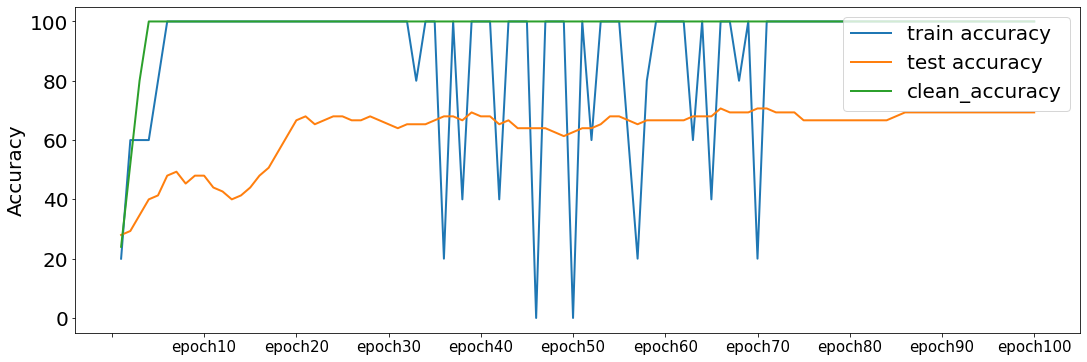

In [18]:
# middle
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/train_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
clean_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_005shot_head_default/test_clean_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
train_acc_clean = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_clean_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
fig = plt.figure(figsize=(18,6))

plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
plt.plot(clean_acc.loc[episode]*100, label='clean_accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

Testing Accuracy of baseline 72.71 ± 0.87


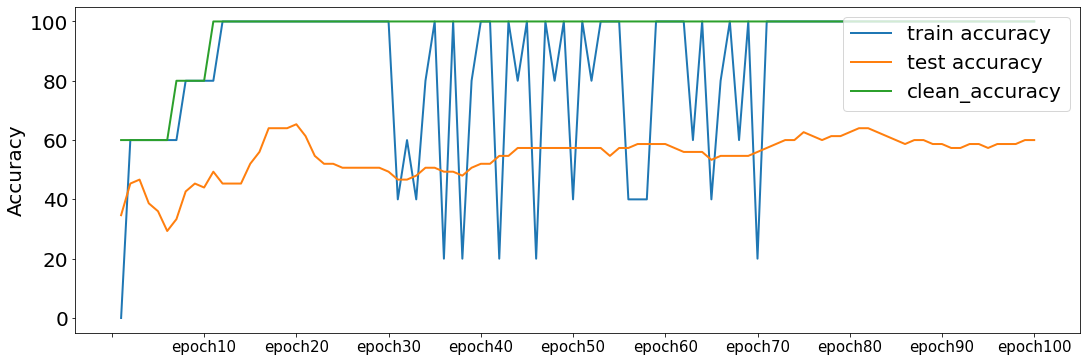

In [298]:
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/train_history_30_70.csv'.format(data), index_col='Unnamed: 0')
clean_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/clean_history_30_70.csv'.format(data), index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/test_history_30_70.csv'.format(data), index_col='Unnamed: 0')
train_acc_clean = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/clean_history_30_70.csv'.format(data), index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
fig = plt.figure(figsize=(18,6))

plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
plt.plot(clean_acc.loc[episode]*100, label='clean_accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

In [299]:
epg = test_acc.max(axis=1) - test_acc.iloc[:,-1]
max_idx = np.argmax(epg)
max_epg = epg[idx]
print("index:", max_idx, "epg:",max_epg*100)
print(test_acc.max(axis=1)[max_idx])
print(test_acc.iloc[:,-1][max_idx])

index: 118 epg: 0.0
0.7599999904632568
0.7599999904632568


Testing Accuracy of baseline 73.12 ± 0.88


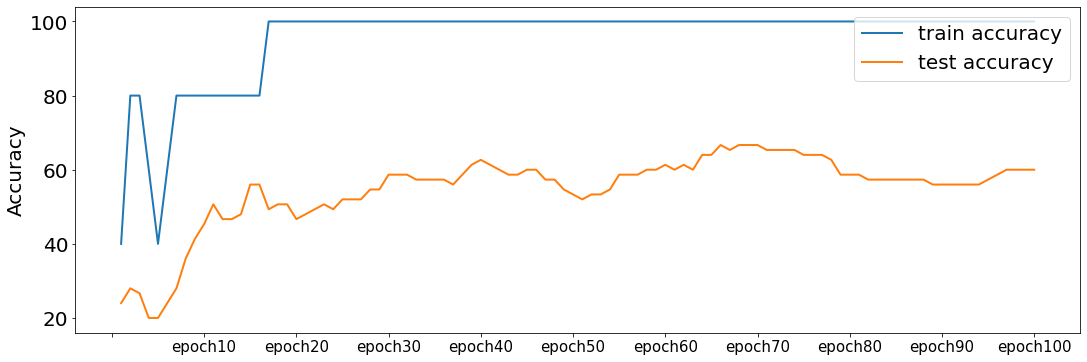

In [300]:
# middle
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/train_history.csv'.format(data), index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history.csv'.format(data), index_col='Unnamed: 0')
#train_acc_clean = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/euro/05way_005shot_head_default/test_clean_history_cutmix_v1.csv', index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
fig = plt.figure(figsize=(18,6))

plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
#plt.plot(train_acc_clean.loc[episode]*100, label='clean_accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

In [295]:
epg = test_acc.max(axis=1) - test_acc.iloc[:,-1]
max_idx = np.argmax(epg)
max_epg = epg[idx]
print("index:", max_idx, "epg:",max_epg*100)
print(test_acc.max(axis=1)[max_idx])
print(test_acc.iloc[:,-1][max_idx])

index: 30 epg: 6.666666269302368
0.3733333349227905
0.293333351612091
